# Rule based

In [48]:
import pandas as pd
import numpy as np
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset


In [49]:
books = pd.read_csv("data/books.csv")
train = pd.read_csv("data/train_ratings.csv")
test = pd.read_csv("data/test_ratings.csv")
users = pd.read_csv("data/users.csv")
sub = pd.read_csv("data/sample_submission.csv")

In [50]:
train

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9
...,...,...,...
306790,278843,0743525493,7
306791,278851,067161746X,6
306792,278851,0884159221,7
306793,278851,0912333022,7


In [51]:
train_df = train.merge(users, how = 'left', on = 'user_id').merge(books, how ='left', on = 'isbn')

In [52]:
train_df

,user_id,isbn,rating,location,age,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,0002005018,4,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,67544,0002005018,7,"toronto, ontario, canada",30.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
2,123629,0002005018,8,"kingston, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
3,200273,0002005018,8,"comber, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
4,210926,0002005018,9,"guelph, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306790,278843,0743525493,7,"pismo beach, california, usa",28.0,The Motley Fool's What To Do with Your Money N...,David Gardner,2002.0,Simon & Schuster Audio,http://images.amazon.com/images/P/0743525493.0...,NaN,NaN,NaN,images/0743525493.01.THUMBZZZ.jpg
306791,278851,067161746X,6,"dallas, texas, usa",33.0,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987.0,Pocket Books,http://images.amazon.com/images/P/067161746X.0...,en,['Humor'],A tongue-in-cheek survival guide for single pe...,images/067161746X.01.THUMBZZZ.jpg
306792,278851,0884159221,7,"dallas, texas, usa",33.0,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,NaN,NaN,NaN,images/0884159221.01.THUMBZZZ.jpg
306793,278851,0912333022,7,"dallas, texas, usa",33.0,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,en,['Fiction'],These hilarious stories by the creator of publ...,images/0912333022.01.THUMBZZZ.jpg


In [53]:
train['isbn'].nunique()

129777

In [54]:
isbn = train_df.groupby(['isbn'])['rating'].mean().to_frame()

In [55]:
isbn_mean = train.merge(isbn, how = 'left', on='isbn')

In [56]:
isbn_mean

,user_id,isbn,rating_x,rating_y
0,8,0002005018,4,6.857143
1,67544,0002005018,7,6.857143
2,123629,0002005018,8,6.857143
3,200273,0002005018,8,6.857143
4,210926,0002005018,9,6.857143
...,...,...,...,...
306790,278843,0743525493,7,7.000000
306791,278851,067161746X,6,6.000000
306792,278851,0884159221,7,7.000000
306793,278851,0912333022,7,7.000000


In [75]:
isbn_mean['sub'] = isbn_mean['rating_x'] - isbn_mean['rating_y']
isbn_mean

,user_id,isbn,rating_x,rating_y,sub
0,8,0002005018,4,6.857143,-2.857143
1,67544,0002005018,7,6.857143,0.142857
2,123629,0002005018,8,6.857143,1.142857
3,200273,0002005018,8,6.857143,1.142857
4,210926,0002005018,9,6.857143,2.142857
...,...,...,...,...,...
306790,278843,0743525493,7,7.000000,0.000000
306791,278851,067161746X,6,6.000000,0.000000
306792,278851,0884159221,7,7.000000,0.000000
306793,278851,0912333022,7,7.000000,0.000000


In [76]:
isbn_mean.describe()

,user_id,rating_x,rating_y,sub
count,306795.000000,306795.000000,306795.000000,3.067950e+05
mean,136128.416099,7.069714,7.069714,4.467020e-18
std,80512.194379,2.433217,1.726891,1.714173e+00
min,8.000000,1.000000,1.000000,-7.806061e+00
25%,67591.000000,6.000000,6.472727,-3.684211e-01
50%,134076.000000,8.000000,7.300000,0.000000e+00
75%,206438.000000,9.000000,8.000000,9.130435e-01
max,278854.000000,10.000000,10.000000,6.845161e+00


In [77]:
isbn_mean['sub'].mean()

4.4670196763222775e-18

In [78]:
isbn_mean['sub'].std()

1.7141732213996124

In [79]:
std_count = isbn_mean.groupby(['isbn'])['sub'].std().value_counts().sort_index()

In [97]:
std_count=std_count.to_frame()

In [89]:
std_count.to_csv("std_count.csv")

array([[<AxesSubplot: title={'center': 'sub'}>]], dtype=object)

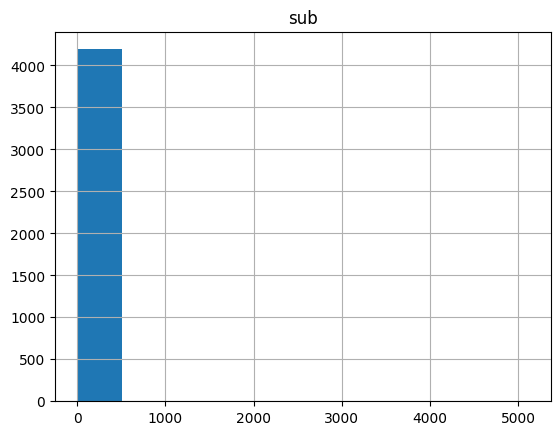

In [98]:
std_count.hist()

In [105]:
train['rating'].mean()

7.069714304340032

In [104]:
train.groupby(['isbn'])['rating'].mean().mean()

6.932617576087269

## 못봤던 사람 -> 7  / 봤던사람 -> 그사람의 평균

In [35]:
train = pd.read_csv("data/train_ratings.csv")
count=train.groupby("user_id").size()
dfcount = pd.DataFrame(count, columns=["count"])
test=pd.merge(test,dfcount, how='left', on='user_id')

test['count'] = test['count'].fillna(0)
test.set_index("user_id",inplace = True)

for row in test.itertuples():
    if row[3] == 0 :
        test.at[row[0],"rating"] = 7
    else:
        test.at[row[0],"rating"] = train[train['user_id']== row[0]]['rating'].mean()

test = test.reset_index()
test = test.drop(['count'], axis=1)



In [36]:
test

,user_id,isbn,rating
0,11676,0002005018,6.779891
1,116866,0002005018,7.734694
2,152827,0060973129,8.400000
3,157969,0374157065,8.000000
4,67958,0399135782,8.090909
...,...,...,...
76694,278543,1576734218,6.666667
76695,278563,3492223710,7.000000
76696,278633,1896095186,7.032258
76697,278668,8408044079,3.000000


## CSV 저장

In [128]:
submission = pd.read_csv( './data/sample_submission.csv')


# test['rating'].head()
submission=pd.concat([submission.drop(['rating'],axis=1),test['rating']],axis=1)
submission.head(10)

,user_id,isbn,rating
0,11676,0002005018,0.0
1,116866,0002005018,0.0
2,152827,0060973129,0.0
3,157969,0374157065,8.0
4,67958,0399135782,0.0
5,213191,0399135782,0.0
6,245827,0399135782,0.0
7,11676,0671870432,0.0
8,263256,1558746218,7.0
9,226745,1881320189,0.0


In [58]:
num = 1
import time

now = time.localtime()
now_date = time.strftime('%Y%m%d', now)
now_hour = time.strftime('%X', now)
save_time = now_date + '_' + now_hour.replace(':', '')
submission.to_csv('submit/{}_rule_based_{}.csv'.format(save_time,num), index=False)


# 기존 파일에 적용

In [134]:
# submission = pd.read_csv('./data/sample_submission.csv')
submission = pd.read_csv('./submit/기존파일.csv')
train = pd.read_csv('./data/train_ratings.csv')

count=train.groupby("user_id").size()
dfcount = pd.DataFrame(count, columns=["count"])

train=pd.merge(train,dfcount, how='left', on='user_id')
submission=pd.merge(submission,dfcount, how='left', on='user_id')
submission['count'] = submission['count'].fillna(0)
submission.set_index("user_id",inplace = True)

for row in submission.itertuples():
    if row[3] == 0 :
        submission.at[row[0],"rating"] = 7
    else:
        if train[train['user_id']== row[0]]['count'].mean() >5 :            #5명 이상이 rating 매긴 user_id
            if train[train['user_id']== row[0]]['rating'].std() < 1:        #각자 매긴 rating 의 표준편차가 1 이하인 사람에게만 적용
                submission.at[row[0],"rating"] = train[train['user_id']== row[0]]['rating'].mean()



submission = submission.reset_index()
submission = submission.drop(['count'], axis=1)


In [112]:
train[train['user_id']== 219008]['rating'].std()
# train.head(10)

1.6138820851026834

In [135]:
submission.head(10)

,user_id,isbn,rating
0,11676,0002005018,8.220166
1,116866,0002005018,9.643744
2,152827,0060973129,9.590261
3,157969,0374157065,8.000000
4,67958,0399135782,10.376624
5,213191,0399135782,6.144351
6,245827,0399135782,5.271151
7,11676,0671870432,6.633573
8,263256,1558746218,7.000000
9,226745,1881320189,8.492176


In [147]:
num = 2

now = time.localtime()
now_date = time.strftime('%Y%m%d', now)
now_hour = time.strftime('%X', now)
save_time = now_date + '_' + now_hour.replace(':', '')
submission.to_csv('submit/{}_rule_based_{}.csv'.format(save_time,num), index=False)